In [23]:
# import packages
import requests
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [24]:
# import original tweet data
file1 = open("TwitterData.txt", "r")
textfile = file1.read()
tweets = textfile.splitlines()
while("" in tweets) :
    tweets.remove("")

In [25]:
def slang(tweets):
    # List to save slang percentage of each tweet
    slangPerc = []
    # LINUX kernel English dictionary
    file = open("/usr/share/dict/words", "r")
    # list of words in English dictionary
    words = re.sub("[^\w]", " ",  file.read()).split()
    # Compares words in tweet to English dictionary to identify slang
    for i in range(len(tweets)):
        # count slang words in tweet
        count = 0
        # list of words in the tweet
        tweetWords = tweets[i].split()
        if len(tweetWords) != 0:
            # iterate through list to compare each word to English dictionary to check for slang
            for j in range(len(tweetWords)):
                word = tweetWords[j]
                if word.strip().lower() in words:
                    continue
                else:
                    count += 1
            slangPerc.append(count/len(tweetWords))
    return slangPerc

In [26]:
# store list of original tweets in a list called sp
sp = slang(tweets)

In [58]:
# list of re-translated tweets (REMOVE - FAKE TEST DATA)
file2 = open("TranslatedData.txt", "r")
textfile = file2.read()
translatedTweets = textfile.splitlines()
while("" in translatedTweets) :
    translatedTweets.remove("")

In [3]:
# import Chinese re-translation
! aws s3 ls s3://translate-file-portnoy/translate/Chinese/en.zh.TwitterData.txt

2021-11-22 02:01:10      48826 en.zh.TwitterData.txt


In [2]:
# import Russian re-translation
! aws s3 ls s3://translate-file-portnoy/translate/Russian/en.ru.TwitterData.txt

2021-11-22 02:00:42      48775 en.ru.TwitterData.txt


In [4]:
# import Spanish re-translation
! aws s3 ls s3://translate-file-portnoy/translate/Spanish/en.es.TwitterData.txt

2021-11-22 02:00:04      51242 en.es.TwitterData.txt


In [5]:
import s3fs
fs = s3fs.S3FileSystem()

In [77]:
fileZh = fs.open('s3://translate-file-portnoy/translate/Chinese/en.zh.TwitterData.txt')
textfile = fileZh.read()
translatedTweetsZh = textfile.splitlines()
while("" in translatedTweetsZh) :
    translatedTweetsZh.remove("")

PermissionError: Access Denied

In [8]:
fileRu = fs.open('s3://translate-file-portnoy/translate/Russian/en.ru.TwitterData.txt')
textfile = fileRu.read()
translatedTweetsRu = textfile.splitlines()
while("" in translatedTweetsRu) :
    translatedTweetsRu.remove("")

PermissionError: Access Denied

In [11]:
fileEs = fs.open('s3://translate-file-portnoy/translate/Spanish/en.es.TwitterData.txt')
textfile = fileEs.read()
translatedTweetsEs = textfile.splitlines()
while("" in translatedTweetsZh) :
    translatedTweetsEs.remove("")

PermissionError: Access Denied

In [19]:
fileZh1 = open("en.zh.TwitterData.txt", "r")
textfile = fileZh1.read()
translatedTweetsZh = textfile.splitlines()
while("" in translatedTweetsZh) :
    translatedTweetsZh.remove("")

In [37]:
fileRu1 = open("en.ru.TwitterData.txt", "r")
textfile = fileRu1.read()
translatedTweetsRu = textfile.splitlines()
while("" in translatedTweetsRu) :
    translatedTweetsRu.remove("")

In [43]:
fileEs1 = open("en.es.TwitterData.txt", "r")
textfile = fileEs1.read()
translatedTweetsEs = textfile.splitlines()
while("" in translatedTweetsEs) :
    translatedTweetsEs.remove("")

In [27]:
def match(tweets, translatedTweets):
    # List to save match percentage of each tweet
    matchPerc = []
    # Compares words in re-translated tweet to original tweet
    for i in range(len(translatedTweets)):
        # list of words in original tweet
        words = tweets[i].split()
        # count matched words in tweet
        count = 0
        # list of words in the re-translated tweet
        tweetWords = translatedTweets[i].split()
        # iterate through list to compare each word to original tweet
        for j in range(len(tweetWords)):
            try:
                word1 = tweetWords[j]
                word2 = words[j]
                if word1.strip().lower() == word2.strip().lower():
                    count += 1
            except:
                continue
        matchPerc.append(count/len(tweetWords))
    return matchPerc

In [70]:
# IGNORE - DELETE BEFORE SUBMITTING
def match2(tweets, translatedTweets):
    # List to save match percentage of each tweet
    matchPerc = []
    # Compares words in re-translated tweet to original tweet
    for i in range(len(translatedTweets)):
        # list of words in original tweet
        words = tweets[i].split()
        # count matched words in tweet
        count = 0
        # list of words in the re-translated tweet
        tweetWords = translatedTweets[i].split()
        # iterate through list to compare each word to original tweet
        for j in range(len(tweetWords)):
            for k in range(len(words)):
                try:
                    word1 = tweetWords[j]
                    word2 = words[k]
                    if word1.strip().lower() == word2.strip().lower():
                        count += 1
                except:
                    continue
        matchPerc.append(count/len(tweetWords))
    return matchPerc

In [44]:
mpZh = match(tweets, translatedTweetsZh)

In [45]:
mpRu = match(tweets, translatedTweetsRu)

In [46]:
mpEs = match(tweets, translatedTweetsEs)

In [49]:
# Create dataframe of slang percentage and match percentage for each tweet in Chinese
dfZh = pd.DataFrame(list(zip(sp, mpZh)), columns =['Slang_Percentage', 'Match_Percentage'])

In [50]:
# Create dataframe of slang percentage and match percentage for each tweet in Russian
dfRu = pd.DataFrame(list(zip(sp, mpRu)), columns =['Slang_Percentage', 'Match_Percentage'])

In [51]:
# Create dataframe of slang percentage and match percentage for each tweet in Spanish
dfEs = pd.DataFrame(list(zip(sp, mpEs)), columns =['Slang_Percentage', 'Match_Percentage'])

Text(0.5, 1.0, 'Distribution of Match Percentage')

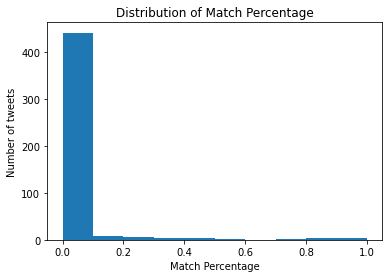

In [52]:
# Histogram to visualise distribution of match percentage data with Chinese translation
plt.hist(dfZh['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Match Percentage')

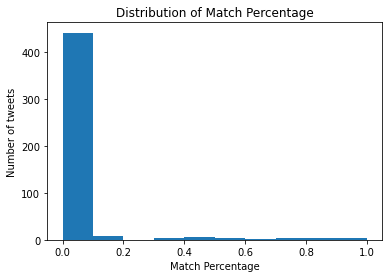

In [53]:
# Histogram to visualise distribution of match percentage data with Russian translation
plt.hist(dfRu['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Match Percentage')

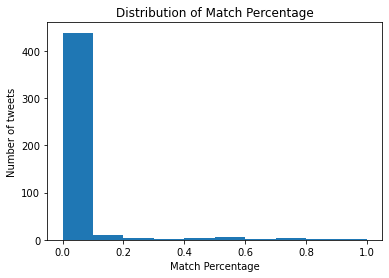

In [54]:
# Histogram to visualise distribution of match percentage data with Spanish translation
plt.hist(dfEs['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Slang Percentage')

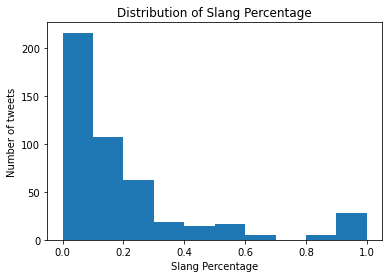

In [31]:
# Histogram to visualise distribution of slang percentage data
plt.hist(df['Slang_Percentage'])
plt.xlabel('Slang Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Slang Percentage')

Text(0, 0.5, 'Match Percentage')

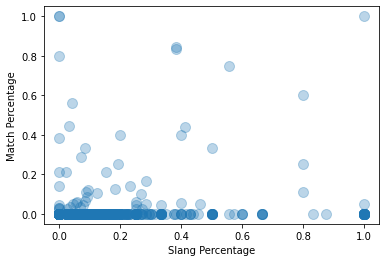

In [78]:
# Plot of match percentage against slang percentage for the Chinese data set
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

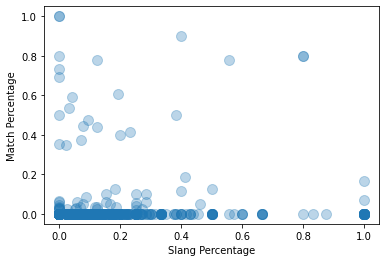

In [79]:
# Plot of match percentage against slang percentage for the Russian data set
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

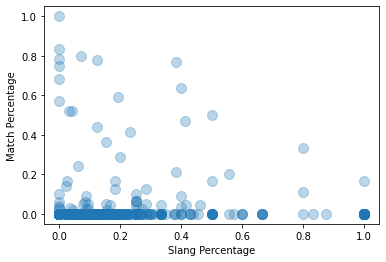

In [80]:
# Plot of match percentage against slang percentage for the Spanish data set
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

In [58]:
# Correlation between slang percentage and match percentage in our Chinese data set
dfZh.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,0.081037
Match_Percentage,0.081037,1.000000


In [59]:
# Correlation between slang percentage and match percentage in our Russian data set
dfRu.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,0.013689
Match_Percentage,0.013689,1.000000


In [60]:
# Correlation between slang percentage and match percentage in our Spanish data set
dfEs.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.019754
Match_Percentage,-0.019754,1.000000


In [61]:
# OLS regression of match percentage on slang percentage for the Chinese data
resultsZh = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZh).fit()

In [62]:
# Results of OLS regression for Chinese data
resultsZh.params

Intercept           0.020934
Slang_Percentage    0.040181
dtype: float64

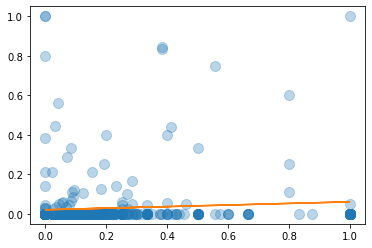

In [63]:
# Plot of data with OLS regression line imposed on top for Chinese data
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZh['Slang_Percentage'], resultsZh.predict(dfZh['Slang_Percentage']))

In [64]:
# OLS regression of match percentage on slang percentage for the Russian data
resultsRu = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfRu).fit()

In [65]:
# Results of OLS regression for Russian data
resultsRu.params

Intercept           0.033417
Slang_Percentage    0.007605
dtype: float64

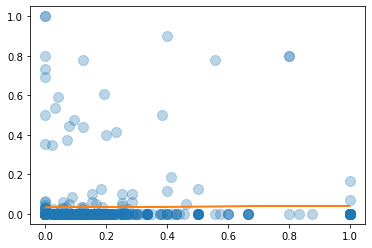

In [66]:
# Plot of data with OLS regression line imposed on top for Russian data
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfRu['Slang_Percentage'], resultsRu.predict(dfRu['Slang_Percentage']))

In [67]:
# OLS regression of match percentage on slang percentage for the Spanish data
resultsEs = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfEs).fit()

In [68]:
# Results of OLS regression for Spanish data
resultsEs.params

Intercept           0.034432
Slang_Percentage   -0.010031
dtype: float64

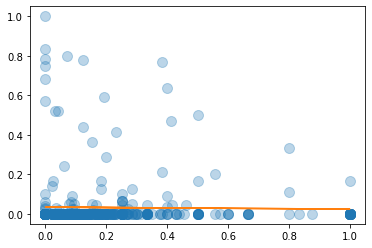

In [75]:
# Plot of data with OLS regression line imposed on top for Spanish data
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfEs['Slang_Percentage'], resultsEs.predict(dfEs['Slang_Percentage']))